Bloom Timing
==

Look at potential environmental factors contributing to the initiation
of the bloom.

* Tidal velocity, tidal phasing relative to insolation, winds
* How anomalous are the conditions that permitted the bloom?
* Consider anomaly with respect to previous weeks, months, and prior summers.

This `Tgrad` notebook looks more closely at the effects of temperature on vertical
mixing.

In [1]:
import sys
sys.path.append("/richmondvol1/rusty/stompy")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from stompy.io.local import noaa_coops
import os
from stompy import utils,filters
import datetime
import xarray as xr                                                                                                                                                     
from stompy.grid import unstructured_grid                                                                                                                               
from stompy import harm_decomp                                                                                                                                          
import logging
import common

from stompy.io.local import cimis
CIMIS_KEY="2cbd0eea-39b0-4e5d-9f05-f9bf1fd2e90d"

import xarray as xr
%matplotlib widget

In [3]:
# Common time periods:
window_of_opportunity=np.timedelta64(5,'D') #care about conditions averaged over 5 days.
bloom_start = np.datetime64("2022-08-08") # center of the window

Tides
==

In [6]:
# Get a longish period of data at Alameda
noaa_alameda=noaa_coops.coops_dataset(9414750,
                                      #np.datetime64("1980-01-01"),
                                      np.datetime64("1996-01-01"), # Start of wind data.
                                      np.datetime64("2023-10-10"),
                                      ['water_level','wind','water_temperature','air_temperature'],
                                      cache_dir='cache',days_per_request="M",
                                      refetch_incomplete=False)

INFO:noaa_coops:Cached   1996-01-01 00:00:00 -- 1996-02-01 00:00:00
INFO:noaa_coops:Cached   1996-02-01 00:00:00 -- 1996-03-01 00:00:00
INFO:noaa_coops:Cached   1996-03-01 00:00:00 -- 1996-04-01 00:00:00
INFO:noaa_coops:Cached   1996-04-01 00:00:00 -- 1996-05-01 00:00:00
INFO:noaa_coops:Cached   1996-05-01 00:00:00 -- 1996-06-01 00:00:00
INFO:noaa_coops:Cached   1996-06-01 00:00:00 -- 1996-07-01 00:00:00
INFO:noaa_coops:Cached   1996-07-01 00:00:00 -- 1996-08-01 00:00:00
INFO:noaa_coops:Cached   1996-08-01 00:00:00 -- 1996-09-01 00:00:00
INFO:noaa_coops:Cached   1996-09-01 00:00:00 -- 1996-10-01 00:00:00
INFO:noaa_coops:Cached   1996-10-01 00:00:00 -- 1996-11-01 00:00:00
INFO:noaa_coops:Cached   1996-11-01 00:00:00 -- 1996-12-01 00:00:00
INFO:noaa_coops:Cached   1996-12-01 00:00:00 -- 1997-01-01 00:00:00
INFO:noaa_coops:Cached   1997-01-01 00:00:00 -- 1997-02-01 00:00:00
INFO:noaa_coops:Cached   1997-02-01 00:00:00 -- 1997-03-01 00:00:00
INFO:noaa_coops:Cached   1997-03-01 00:00:00 -- 

INFO:noaa_coops:Cached   1998-05-01 00:00:00 -- 1998-06-01 00:00:00
INFO:noaa_coops:Cached   1998-06-01 00:00:00 -- 1998-07-01 00:00:00
INFO:noaa_coops:Cached   1998-07-01 00:00:00 -- 1998-08-01 00:00:00
INFO:noaa_coops:Cached   1998-08-01 00:00:00 -- 1998-09-01 00:00:00
INFO:noaa_coops:Cached   1998-09-01 00:00:00 -- 1998-10-01 00:00:00
INFO:noaa_coops:Cached   1998-10-01 00:00:00 -- 1998-11-01 00:00:00
INFO:noaa_coops:Cached   1998-11-01 00:00:00 -- 1998-12-01 00:00:00
INFO:noaa_coops:Cached   1998-12-01 00:00:00 -- 1999-01-01 00:00:00
INFO:noaa_coops:Cached   1999-01-01 00:00:00 -- 1999-02-01 00:00:00
INFO:noaa_coops:Cached   1999-02-01 00:00:00 -- 1999-03-01 00:00:00
INFO:noaa_coops:Cached   1999-03-01 00:00:00 -- 1999-04-01 00:00:00
INFO:noaa_coops:Cached   1999-04-01 00:00:00 -- 1999-05-01 00:00:00
INFO:noaa_coops:Cached   1999-05-01 00:00:00 -- 1999-06-01 00:00:00
INFO:noaa_coops:Cached   1999-06-01 00:00:00 -- 1999-07-01 00:00:00
INFO:noaa_coops:Cached   1999-07-01 00:00:00 -- 

INFO:noaa_coops:Fetching 2007-06-01 00:00:00 -- 2007-07-01 00:00:00
INFO:noaa_coops:Fetching 2007-07-01 00:00:00 -- 2007-08-01 00:00:00
INFO:noaa_coops:Fetching 2007-08-01 00:00:00 -- 2007-09-01 00:00:00
INFO:noaa_coops:Fetching 2007-09-01 00:00:00 -- 2007-10-01 00:00:00
INFO:noaa_coops:Fetching 2007-10-01 00:00:00 -- 2007-11-01 00:00:00
INFO:noaa_coops:Fetching 2007-11-01 00:00:00 -- 2007-12-01 00:00:00
INFO:noaa_coops:Fetching 2007-12-01 00:00:00 -- 2008-01-01 00:00:00
INFO:noaa_coops:Fetching 2008-01-01 00:00:00 -- 2008-02-01 00:00:00
INFO:noaa_coops:Fetching 2008-02-01 00:00:00 -- 2008-03-01 00:00:00
INFO:noaa_coops:Fetching 2008-03-01 00:00:00 -- 2008-04-01 00:00:00
INFO:noaa_coops:Fetching 2008-04-01 00:00:00 -- 2008-05-01 00:00:00
INFO:noaa_coops:Fetching 2008-05-01 00:00:00 -- 2008-06-01 00:00:00
INFO:noaa_coops:Fetching 2008-06-01 00:00:00 -- 2008-07-01 00:00:00
INFO:noaa_coops:Fetching 2008-07-01 00:00:00 -- 2008-08-01 00:00:00
INFO:noaa_coops:Fetching 2008-08-01 00:00:00 -- 

INFO:noaa_coops:Cached   2016-07-01 00:00:00 -- 2016-08-01 00:00:00
INFO:noaa_coops:Cached   2016-08-01 00:00:00 -- 2016-09-01 00:00:00
INFO:noaa_coops:Cached   2016-09-01 00:00:00 -- 2016-10-01 00:00:00
INFO:noaa_coops:Cached   2016-10-01 00:00:00 -- 2016-11-01 00:00:00
INFO:noaa_coops:Cached   2016-11-01 00:00:00 -- 2016-12-01 00:00:00
INFO:noaa_coops:Cached   2016-12-01 00:00:00 -- 2017-01-01 00:00:00
INFO:noaa_coops:Cached   2017-01-01 00:00:00 -- 2017-02-01 00:00:00
INFO:noaa_coops:Cached   2017-02-01 00:00:00 -- 2017-03-01 00:00:00
INFO:noaa_coops:Cached   2017-03-01 00:00:00 -- 2017-04-01 00:00:00
INFO:noaa_coops:Cached   2017-04-01 00:00:00 -- 2017-05-01 00:00:00
INFO:noaa_coops:Cached   2017-05-01 00:00:00 -- 2017-06-01 00:00:00
INFO:noaa_coops:Cached   2017-06-01 00:00:00 -- 2017-07-01 00:00:00
INFO:noaa_coops:Cached   2017-07-01 00:00:00 -- 2017-08-01 00:00:00
INFO:noaa_coops:Cached   2017-08-01 00:00:00 -- 2017-09-01 00:00:00
INFO:noaa_coops:Cached   2017-09-01 00:00:00 -- 

INFO:noaa_coops:Cached   1998-10-01 00:00:00 -- 1998-11-01 00:00:00
INFO:noaa_coops:Cached   1998-11-01 00:00:00 -- 1998-12-01 00:00:00
INFO:noaa_coops:Cached   1998-12-01 00:00:00 -- 1999-01-01 00:00:00
INFO:noaa_coops:Cached   1999-01-01 00:00:00 -- 1999-02-01 00:00:00
INFO:noaa_coops:Cached   1999-02-01 00:00:00 -- 1999-03-01 00:00:00
INFO:noaa_coops:Cached   1999-03-01 00:00:00 -- 1999-04-01 00:00:00
INFO:noaa_coops:Cached   1999-04-01 00:00:00 -- 1999-05-01 00:00:00
INFO:noaa_coops:Cached   1999-05-01 00:00:00 -- 1999-06-01 00:00:00
INFO:noaa_coops:Cached   1999-06-01 00:00:00 -- 1999-07-01 00:00:00
INFO:noaa_coops:Cached   1999-07-01 00:00:00 -- 1999-08-01 00:00:00
INFO:noaa_coops:Cached   1999-08-01 00:00:00 -- 1999-09-01 00:00:00
INFO:noaa_coops:Cached   1999-09-01 00:00:00 -- 1999-10-01 00:00:00
INFO:noaa_coops:Cached   1999-10-01 00:00:00 -- 1999-11-01 00:00:00
INFO:noaa_coops:Cached   1999-11-01 00:00:00 -- 1999-12-01 00:00:00
INFO:noaa_coops:Cached   1999-12-01 00:00:00 -- 

INFO:noaa_coops:Cached   2008-10-01 00:00:00 -- 2008-11-01 00:00:00
INFO:noaa_coops:Cached   2008-11-01 00:00:00 -- 2008-12-01 00:00:00
INFO:noaa_coops:Cached   2008-12-01 00:00:00 -- 2009-01-01 00:00:00
INFO:noaa_coops:Cached   2009-01-01 00:00:00 -- 2009-02-01 00:00:00
INFO:noaa_coops:Cached   2009-02-01 00:00:00 -- 2009-03-01 00:00:00
INFO:noaa_coops:Cached   2009-03-01 00:00:00 -- 2009-04-01 00:00:00
INFO:noaa_coops:Cached   2009-04-01 00:00:00 -- 2009-05-01 00:00:00
INFO:noaa_coops:Cached   2009-05-01 00:00:00 -- 2009-06-01 00:00:00
INFO:noaa_coops:Cached   2009-06-01 00:00:00 -- 2009-07-01 00:00:00
INFO:noaa_coops:Cached   2009-07-01 00:00:00 -- 2009-08-01 00:00:00
INFO:noaa_coops:Cached   2009-08-01 00:00:00 -- 2009-09-01 00:00:00
INFO:noaa_coops:Cached   2009-09-01 00:00:00 -- 2009-10-01 00:00:00
INFO:noaa_coops:Cached   2009-10-01 00:00:00 -- 2009-11-01 00:00:00
INFO:noaa_coops:Cached   2009-11-01 00:00:00 -- 2009-12-01 00:00:00
INFO:noaa_coops:Cached   2009-12-01 00:00:00 -- 

INFO:noaa_coops:Cached   2018-11-01 00:00:00 -- 2018-12-01 00:00:00
INFO:noaa_coops:Cached   2018-12-01 00:00:00 -- 2019-01-01 00:00:00
INFO:noaa_coops:Cached   2019-01-01 00:00:00 -- 2019-02-01 00:00:00
INFO:noaa_coops:Cached   2019-02-01 00:00:00 -- 2019-03-01 00:00:00
INFO:noaa_coops:Cached   2019-03-01 00:00:00 -- 2019-04-01 00:00:00
INFO:noaa_coops:Cached   2019-04-01 00:00:00 -- 2019-05-01 00:00:00
INFO:noaa_coops:Cached   2019-05-01 00:00:00 -- 2019-06-01 00:00:00
INFO:noaa_coops:Cached   2019-06-01 00:00:00 -- 2019-07-01 00:00:00
INFO:noaa_coops:Cached   2019-07-01 00:00:00 -- 2019-08-01 00:00:00
INFO:noaa_coops:Cached   2019-08-01 00:00:00 -- 2019-09-01 00:00:00
INFO:noaa_coops:Cached   2019-09-01 00:00:00 -- 2019-10-01 00:00:00
INFO:noaa_coops:Cached   2019-10-01 00:00:00 -- 2019-11-01 00:00:00
INFO:noaa_coops:Cached   2019-11-01 00:00:00 -- 2019-12-01 00:00:00
INFO:noaa_coops:Cached   2019-12-01 00:00:00 -- 2020-01-01 00:00:00
INFO:noaa_coops:Cached   2020-01-01 00:00:00 -- 

INFO:noaa_coops:Cached   2000-07-01 00:00:00 -- 2000-08-01 00:00:00
INFO:noaa_coops:Cached   2000-08-01 00:00:00 -- 2000-09-01 00:00:00
INFO:noaa_coops:Cached   2000-09-01 00:00:00 -- 2000-10-01 00:00:00
INFO:noaa_coops:Cached   2000-10-01 00:00:00 -- 2000-11-01 00:00:00
INFO:noaa_coops:Cached   2000-11-01 00:00:00 -- 2000-12-01 00:00:00
INFO:noaa_coops:Cached   2000-12-01 00:00:00 -- 2001-01-01 00:00:00
INFO:noaa_coops:Cached   2001-01-01 00:00:00 -- 2001-02-01 00:00:00
INFO:noaa_coops:Cached   2001-02-01 00:00:00 -- 2001-03-01 00:00:00
INFO:noaa_coops:Cached   2001-03-01 00:00:00 -- 2001-04-01 00:00:00
INFO:noaa_coops:Cached   2001-04-01 00:00:00 -- 2001-05-01 00:00:00
INFO:noaa_coops:Cached   2001-05-01 00:00:00 -- 2001-06-01 00:00:00
INFO:noaa_coops:Cached   2001-06-01 00:00:00 -- 2001-07-01 00:00:00
INFO:noaa_coops:Cached   2001-07-01 00:00:00 -- 2001-08-01 00:00:00
INFO:noaa_coops:Cached   2001-08-01 00:00:00 -- 2001-09-01 00:00:00
INFO:noaa_coops:Cached   2001-09-01 00:00:00 -- 

INFO:noaa_coops:Cached   2010-08-01 00:00:00 -- 2010-09-01 00:00:00
INFO:noaa_coops:Cached   2010-09-01 00:00:00 -- 2010-10-01 00:00:00
INFO:noaa_coops:Cached   2010-10-01 00:00:00 -- 2010-11-01 00:00:00
INFO:noaa_coops:Cached   2010-11-01 00:00:00 -- 2010-12-01 00:00:00
INFO:noaa_coops:Cached   2010-12-01 00:00:00 -- 2011-01-01 00:00:00
INFO:noaa_coops:Cached   2011-01-01 00:00:00 -- 2011-02-01 00:00:00
INFO:noaa_coops:Cached   2011-02-01 00:00:00 -- 2011-03-01 00:00:00
INFO:noaa_coops:Cached   2011-03-01 00:00:00 -- 2011-04-01 00:00:00
INFO:noaa_coops:Cached   2011-04-01 00:00:00 -- 2011-05-01 00:00:00
INFO:noaa_coops:Cached   2011-05-01 00:00:00 -- 2011-06-01 00:00:00
INFO:noaa_coops:Cached   2011-06-01 00:00:00 -- 2011-07-01 00:00:00
INFO:noaa_coops:Cached   2011-07-01 00:00:00 -- 2011-08-01 00:00:00
INFO:noaa_coops:Cached   2011-08-01 00:00:00 -- 2011-09-01 00:00:00
INFO:noaa_coops:Cached   2011-09-01 00:00:00 -- 2011-10-01 00:00:00
INFO:noaa_coops:Cached   2011-10-01 00:00:00 -- 

INFO:noaa_coops:Cached   2020-09-01 00:00:00 -- 2020-10-01 00:00:00
INFO:noaa_coops:Cached   2020-10-01 00:00:00 -- 2020-11-01 00:00:00
INFO:noaa_coops:Cached   2020-11-01 00:00:00 -- 2020-12-01 00:00:00
INFO:noaa_coops:Cached   2020-12-01 00:00:00 -- 2021-01-01 00:00:00
INFO:noaa_coops:Cached   2021-01-01 00:00:00 -- 2021-02-01 00:00:00
INFO:noaa_coops:Cached   2021-02-01 00:00:00 -- 2021-03-01 00:00:00
INFO:noaa_coops:Cached   2021-03-01 00:00:00 -- 2021-04-01 00:00:00
INFO:noaa_coops:Cached   2021-04-01 00:00:00 -- 2021-05-01 00:00:00
INFO:noaa_coops:Cached   2021-05-01 00:00:00 -- 2021-06-01 00:00:00
INFO:noaa_coops:Cached   2021-06-01 00:00:00 -- 2021-07-01 00:00:00
INFO:noaa_coops:Cached   2021-07-01 00:00:00 -- 2021-08-01 00:00:00
INFO:noaa_coops:Cached   2021-08-01 00:00:00 -- 2021-09-01 00:00:00
INFO:noaa_coops:Cached   2021-09-01 00:00:00 -- 2021-10-01 00:00:00
INFO:noaa_coops:Cached   2021-10-01 00:00:00 -- 2021-11-01 00:00:00
INFO:noaa_coops:Cached   2021-11-01 00:00:00 -- 

In [7]:
alameda_regular=common.resample(noaa_alameda.isel(station=0),np.timedelta64(900,'s'))

KeyboardInterrupt: 

In [ ]:
#wse=alameda_regular.water_level
#wse_mean= filters.lowpass_fir(wse**2,winsize=np.timedelta64(60,'h'))**0.5
#        
#def lp(x):
#    return filters.lowpass_fir(x,winsize=np.timedelta64(60,'h'))
#rms_tide=lp( (wse - lp(wse))**2 ) ** 0.5
#rms_tide.name="RMS tide"                             
#
#fig,ax=plt.subplots()
#
#agg_metric=filters.lowpass_fir(rms_tide,winsize=np.timedelta64(5,'D'),window='boxcar')
#agg_metric.plot(label='5 day boxcar')
#
#ax.legend(loc='upper right')
#ax.axvline(bloom_start,color='k',lw=0.75)

In [8]:
# For a given metric, plot some date ranges, and compare time of bloom
# to overall distribution
window=window_of_opportunity
time_res=np.timedelta64(1,'D')

def yearly_sel(t,min_doy,max_doy):
    doy=(t - t.astype('M8[Y]'))/np.timedelta64(1,'D')
    return (doy>=min_doy)&(doy<max_doy)

periods=[ 
    dict(name='previous month',
         label='prevmonth',
         pred=lambda t: (t>=np.datetime64("2022-07-10")) & (t<np.datetime64("2022-08-10"))),
    dict(name='previous 2 months',
         label='prev2months',
         pred=lambda t: (t>=np.datetime64("2022-06-10")) & (t<np.datetime64("2022-08-10"))),
    dict(name='July-Aug yearly',
         label='all_july_aug',
         pred=lambda t: yearly_sel(t,181,243) # July 1 to Aug 31, +-leap day 
        ),
]


def metric_cdfs(metric_da,window=window_of_opportunity,
                time_res=np.timedelta64(1,'D'),
                bloom_start=np.datetime64("2022-08-04"),
                show_unfiltered=False,
                periods=periods):
    """
    Plot univariate distributions of the given metric, averaged over
    window-of-opportunity (boxcar), and show where the bloom period
    falls within the distributions, for multiple periods.
    
    metric_da is expected to have a meaningful name.
    show_unfiltered: also plot the metric before any averaging.
    return a list of figures corresponding to the periods.
    """
    if isinstance(metric_da,tuple):
        metric_da1,metric_da2,join = metric_da
        metric_da=join(metric_da1,metric_da2)
    else:
        metric_da1=metric_da2=None
        
    # aggregate over window of opportunity:
    metric = metric_da.values
    agg_metric = filters.lowpass_fir(metric_da,window,window='boxcar')
    agg_metric.name = metric_da.name+", 5d boxcar"
    stride=int(time_res/ np.median(np.diff(agg_metric.time)))
    agg_metric = agg_metric.isel(time=slice(None,None,stride))
    
    sample=agg_metric.sel(time=bloom_start, method='nearest')
        
    t=agg_metric.time.values
    figs=[]
    for period in periods:
        sel=period['pred'](t)
        period_metric=agg_metric.isel(time=sel)
        period_samples = period_metric.values
        period_samples=period_samples[ np.isfinite(period_samples) ]
        period_samples = np.sort(period_samples)
        rank=np.searchsorted(period_samples,sample)
        pctile=100*rank/len(period_samples)
        
        print(f"{period['name']}: {pctile:.1f} percentile")
        
        fig,axs=plt.subplots(1,2,figsize=(8,4.5))
        
        axs[0].plot(agg_metric.time, agg_metric,color='0.6',lw=0.75,label=agg_metric.name)
        axs[0].plot(agg_metric.time, np.where(sel,agg_metric.values,np.nan),label='Comparison period')
        axs[0].axvline(bloom_start,color='k',lw=0.8,label='Bloom start')
        if show_unfiltered:
            axs[0].plot(metric_da.time, metric_da, color='0.8',lw=0.5,alpha=0.5,zorder=-1,
                       label=metric_da.name)
        
        axs[1].hist( period_samples, bins=20)
        axs[1].axvline(sample,color='k',lw=0.8)
        axs[1].set_xlabel('Period metric')
        label=metric_da.name
        axs[1].set_title(f"{label}, {period['name']}\n{pctile:.1f} percentile",fontsize=9)
        # ha='right',va='top',transform=axs[1].transAxes)

        t_range=[period_metric.time.min(),
                 period_metric.time.max()]
        pad=0.08*(t_range[1]-t_range[0])
        axs[0].axis( xmin=t_range[0]-pad,xmax=t_range[1]+pad)
        axs[0].legend(loc='lower left',bbox_to_anchor=(-0.2,1.02),frameon=0,ncol=2)
        fig.subplots_adjust(top=0.8,right=0.97,bottom=0.1)
        fig.autofmt_xdate()
        figs.append(fig)
        
    return figs
        

Load Actual Solar Radiation
--

In [9]:
# the existing data:
cimisA=xr.open_dataset("/richmondvol1/hpcshared/inputs/cimis/union_city-hourly-2001-2016.nc")
cimisA=cimisA.set_coords('time').swap_dims({'Date':'time'})
cimisA['time']=cimisA['time']+np.timedelta64(8,'h') # to UTC

cimisB=cimis.cimis_fetch_to_xr(stations=[171],
                               start_date=np.datetime64("2019-01-01"),
                               end_date = np.datetime64("2023-10-01"),
                               cache_dir='cache',
                               cimis_key=CIMIS_KEY)

cimisB['time']=cimisB['time']+np.timedelta64(8,'h') # to UTC

cimisBslice=cimisB.isel( time=cimisB.time.values>cimisA.time.values[-1])
cimis_ds = xr.concat([cimisA.drop('Date'),cimisBslice],dim='time')

bad = cimis_ds.HlySolRad.values<0
cimis_ds.HlySolRad.values[bad]=np.nan

INFO:root:Cached   2018-12-25 00:00:00 -- 2019-01-04 00:00:00
INFO:root:Cached   2019-01-04 00:00:00 -- 2019-01-14 00:00:00
INFO:root:Cached   2019-01-14 00:00:00 -- 2019-01-24 00:00:00
INFO:root:Cached   2019-01-24 00:00:00 -- 2019-02-03 00:00:00
INFO:root:Cached   2019-02-03 00:00:00 -- 2019-02-13 00:00:00
INFO:root:Cached   2019-02-13 00:00:00 -- 2019-02-23 00:00:00
INFO:root:Cached   2019-02-23 00:00:00 -- 2019-03-05 00:00:00
INFO:root:Cached   2019-03-05 00:00:00 -- 2019-03-15 00:00:00
INFO:root:Cached   2019-03-15 00:00:00 -- 2019-03-25 00:00:00
INFO:root:Cached   2019-03-25 00:00:00 -- 2019-04-04 00:00:00
INFO:root:Cached   2019-04-04 00:00:00 -- 2019-04-14 00:00:00
INFO:root:Cached   2019-04-14 00:00:00 -- 2019-04-24 00:00:00
INFO:root:Cached   2019-04-24 00:00:00 -- 2019-05-04 00:00:00
INFO:root:Cached   2019-05-04 00:00:00 -- 2019-05-14 00:00:00
INFO:root:Cached   2019-05-14 00:00:00 -- 2019-05-24 00:00:00
INFO:root:Cached   2019-05-24 00:00:00 -- 2019-06-03 00:00:00
INFO:roo

Mechanistic Solar Radiation + Tides
==

In [12]:
# Load harmonics, choose a location
harmonics = xr.open_dataset("../empirical_kd/Data_HydroHarmonics/harmonics-wy2013.nc")
grid_harmonics=unstructured_grid.UnstructuredGrid.read_ugrid(harmonics)

In [290]:
harmonics

<xarray.Dataset>
Dimensions:          (component: 38, face: 49996, amp_phase: 2, node: 44184,
                      maxnode_per_face: 6, edge: 94194, node_per_edge: 2)
Coordinates:
  * component        (component) object 'SA' 'SSA' 'MM' 'MSF' ... 'S6' 'M8' 'DC'
  * amp_phase        (amp_phase) object 'amp' 'phase'
Dimensions without coordinates: face, node, maxnode_per_face, edge,
                                node_per_edge
Data variables:
    t_ref            datetime64[ns] 1970-01-01
    omegas           (component) float64 1.991e-07 3.982e-07 ... 0.0005621 0.0
    stage_harmonics  (face, component, amp_phase) float64 nan nan ... nan nan
    u_harmonics      (face, component, amp_phase) float64 2.834e-06 ... 3.142
    v_harmonics      (face, component, amp_phase) float64 2.095e-06 ... 3.142
    mesh             int64 ...
    node_x           (node) float64 5.809e+05 5.825e+05 ... 5.425e+05 5.426e+05
    node_y           (node) float64 4.151e+06 4.152e+06 ... 4.153e+06 4.153e+06
    face_node        (face, maxnode_per_face) int32 295 297 298 ... 43385 -1 -1
    edge_node        (edge, node_per_edge) int32 295 297 297 ... 43449 43385

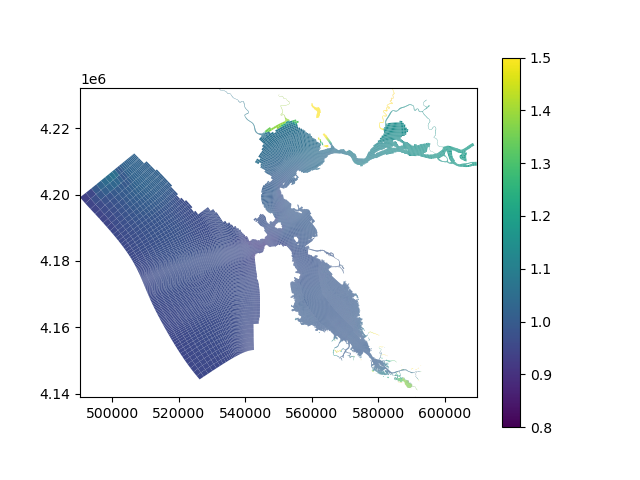

In [293]:
# Would like to get a depth to go along with harmonics.
# stage does have a DC component, but it's relative to NAVD88, not the
# bed.

In [287]:
def get_local_tides_ds(utm, time):
    c=grid_harmonics.select_cells_nearest(utm)
    omegas=harmonics.omegas.values
    # Don't really care about principal direction.
    # Model runs in UTC, so harmonics are referenced to UTC
    time_s = (time - harmonics.t_ref.values) / np.timedelta64(1,'s')

    h_comps = harmonics.stage_harmonics.isel(face=c)
    h_pred=harm_decomp.recompose(time_s,h_comps.values, omegas)
    
    u_comps = harmonics.u_harmonics.isel(face=c)
    u_pred=harm_decomp.recompose(time_s,u_comps.values, omegas)                                                                                                          

    v_comps = harmonics.v_harmonics.isel(face=c)
    v_pred=harm_decomp.recompose(time_s,v_comps.values, omegas)
    
    speed_pred=np.sqrt(u_pred**2 + v_pred**2)

    ds=xr.Dataset()
    ds['time']=('time'),time
    ds['h'] = ('time',),h_pred
    ds['u'] = ('time',),u_pred
    ds['v'] = ('time',),v_pred
    ds['speed'] = ('time',),speed_pred
    ds['x'] = (), utm[0]
    ds['y'] = (), utm[1]
    
    return ds
    
def get_local_tides(utm, time):
    c=grid_harmonics.select_cells_nearest(utm)
    omegas=harmonics.omegas.values
    # Don't really care about principal direction.
    # Model runs in UTC, so harmonics are referenced to UTC
    time_s = (time - harmonics.t_ref.values) / np.timedelta64(1,'s')

    h_comps = harmonics.stage_harmonics.isel(face=c)
    h_pred=harm_decomp.recompose(time_s,h_comps.values, omegas)
    
    u_comps = harmonics.u_harmonics.isel(face=c)
    u_pred=harm_decomp.recompose(time_s,u_comps.values, omegas)                                                                                                          

    v_comps = harmonics.v_harmonics.isel(face=c)
    v_pred=harm_decomp.recompose(time_s,v_comps.values, omegas)
    
    speed_pred=np.sqrt(u_pred**2 + v_pred**2)
    
    return h_pred, speed_pred             

(544437.0, 585003.0, 4155454.0, 4189217.0)

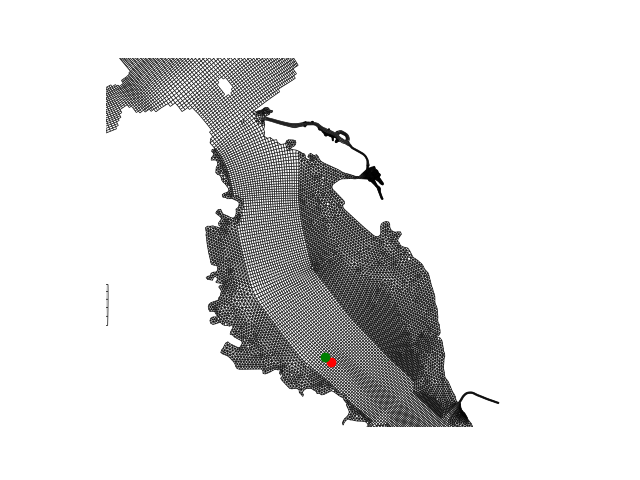

In [14]:
fig,ax=plt.subplots()
grid_harmonics.plot_edges(ax=ax,lw=0.5,color='k')
#pnt=[560450,4177960] # S of Alameda.
pnt=[565000, 4.16141e6] # time series extraction point in plot_transport_and_swimming. Near SMB
ax.plot(pnt[0],pnt[1],'ro')

ax.plot(564438., 4161870., 'go')
ax.axis( (544437, 585003, 4155454, 4189217) )
ax.axis('off')

In [10]:
# Closer look at DFM output -- how well are the harmonics doing?
# map output is 24h, not that useful.
import stompy.model.delft.dflow_model as dfm
dfm_rundir="/boisevol1/hpcshared/open_bay/hydro/full_res/wy2022_r52184/runs/wy2022_r52184"
model = dfm.DFlowModel.load(dfm_rundir)
hist_ds=model.his_dataset()

Yuck - duplicate source_sink names
Yuck - duplicate stations names


In [299]:
# Copy the DFM depth to grid_harmonics
# n_map,e_map,c_map = model.grid.map_to_grid(grid_harmonics)
# HERE

In [16]:
df=cimis_ds['HlySolRad'].to_dataframe()
#pnt=[560450,4177960]
# pnt=[565000, 4.16141e6]
pnt=[ 564438., 4161870.] # also SMB, but aligns with DFM history station.

# harmonic velocity
tide_h,tide_speed = get_local_tides(pnt,df.index.values)
df['tide_speed_harm']=tide_speed
df['tide_h_harm'] = tide_h

if 1: # DFM velocity when present
    hist_xy = np.c_[ hist_ds.station_x_coordinate.isel(time=0).values,
                     hist_ds.station_y_coordinate.isel(time=0).values]
    station_dist=utils.dist(pnt,hist_xy)
    station_idx = np.argmin(station_dist)
    # For the SMB point, this is fine -- 700m along channel..
    print(f"Point {pnt}: nearest station in history is {station_dist[station_idx]} m away, {hist_xy[station_idx]}")
    
    dfm_u=hist_ds.isel(stations=station_idx)['x_velocity'].mean(dim='laydim')
    dfm_v=hist_ds.isel(stations=station_idx)['y_velocity'].mean(dim='laydim')

    df_dfm = pd.DataFrame()
    df_dfm['time'] = hist_ds.time
    df_dfm['tide_u_dfm'] = dfm_u
    df_dfm['tide_v_dfm'] = dfm_v
    df_dfm['tide_speed_dfm'] = np.sqrt(dfm_u**2+dfm_v**2)
    df_dfm = df_dfm.set_index('time')
    for vname in ['tide_u_dfm','tide_v_dfm','tide_speed_dfm']:
        df[vname] = df_dfm[vname]

    df['tide_speed']=df['tide_speed_dfm'].combine_first(df['tide_speed_harm'])
else:
    df['tide_speed']=dfdf['tide_speed_harm']

Point [564438.0, 4161870.0]: nearest station in history is 0.0 m away, [ 564438. 4161870.]


In [17]:
# Water column "model"
from stompy.model import water_column
import common
import six
six.moves.reload_module(water_column)
six.moves.reload_module(common)
six.moves.reload_module(utils)
from common import k_indef

class WaterColumn(water_column.WaterColumn):
    """
    Water column driven by time-varying tidal velocity
    """
    H=8 # depth of water column
    Cd=0.001
    ws=15.0 # upward swimming, m/d
    dz=0.2
    dt=np.timedelta64(900,'s')

    df=None # time-valued index, tide speed field, maybe others...
    speed_field='tide_speed' # field of df

    def __init__(self,**kw):
        utils.set_keywords(self,kw)
        self.init_state()

    def init_state(self):
        self.t0=self.df.index.values[0]
        self.data_t_s = (self.df.index.values - self.t0) / np.timedelta64(1,'s')
        self.data_u   = self.df[self.speed_field].values        
        super().init_state()
        
    def u_mag(self):
        return np.interp( self.t_s, self.data_t_s, self.data_u)

class GrowthColumn(WaterColumn):
    """
    Add solar radiation, Kd, and estimate of growth potential
    """
    sol_rad_field='HlySolRad'
    Gmax = 0.6 # "instantaneous" maximum growth rate, [d-1]
    
    Kd=2.5 # m-1
    Isat=40.0 # half-saturation light intensity

    def init_state(self):
        super().init_state()
        self.data_sol_rad=utils.fill_invalid(self.df[self.sol_rad_field].values.copy())
    def sol_rad(self):
        return np.interp(self.t_s, self.data_t_s, self.data_sol_rad)

    def growth_potential(self):
        """
        water-column averaged growth rate for current state
        """
        sol_rad = self.sol_rad()
        C_avg=self.C.mean()

        # z_int is positive up, and holds negative values, from -H to 0.
        klight_indef =k_indef(-self.z_int,self.Kd,sol_rad,self.Isat)
        # separate effects of tidal mixing, phase of tides w.r.t. daylight
        kfullsun_indef=k_indef(-self.z_int,self.Kd,1000,self.Isat)
        sol_rad_ideal = utils.ideal_solar_rad(self.t)
        kideal_indef  = k_indef(-self.z_int,self.Kd,sol_rad_ideal,self.Isat)
        sol_rad_diurnal = utils.ideal_solar_rad(self.t, declination=False)
        kdiurnal_indef  = k_indef(-self.z_int,self.Kd,sol_rad_diurnal,self.Isat)
    
        # Concentration weighted average
        # negate klight_indef because (-self.z_int) is descending.
        growth_avg=self.Gmax*np.sum(self.C*np.diff(-klight_indef)) / (self.H*C_avg)
        growth_fullsun = self.Gmax*np.sum(self.C*np.diff(-kfullsun_indef)) / (self.H*C_avg)
        growth_idealsun = self.Gmax*np.sum(self.C*np.diff(-kideal_indef)) / (self.H*C_avg)
        growth_diurnal = self.Gmax*np.sum(self.C*np.diff(-kdiurnal_indef)) / (self.H*C_avg)
        
        return dict(growth=growth_avg, growth_fullsun=growth_fullsun, growth_ideal=growth_idealsun, 
                    growth_diurnal=growth_diurnal)

    def compute_all_growth(self):
        """
        Integrate over the duration of self.df and populate self.df['growth']
        """
        self.t = self.t0
        self.spin()

        recs=[]
        
        times=self.df.index.values
        for i,t in utils.progress(enumerate(times),func=logging.warning):
            self.step_until(t)
            rec= self.growth_potential()
            rec['s_median'] = common.sigma_median(wc.C)
            rec['time'] = t
            recs.append(rec)
        df_output=pd.DataFrame(recs).set_index('time')

        for col in df_output.columns:
            self.df[col] = df_output[col]

NameError: name 'wc' is not defined

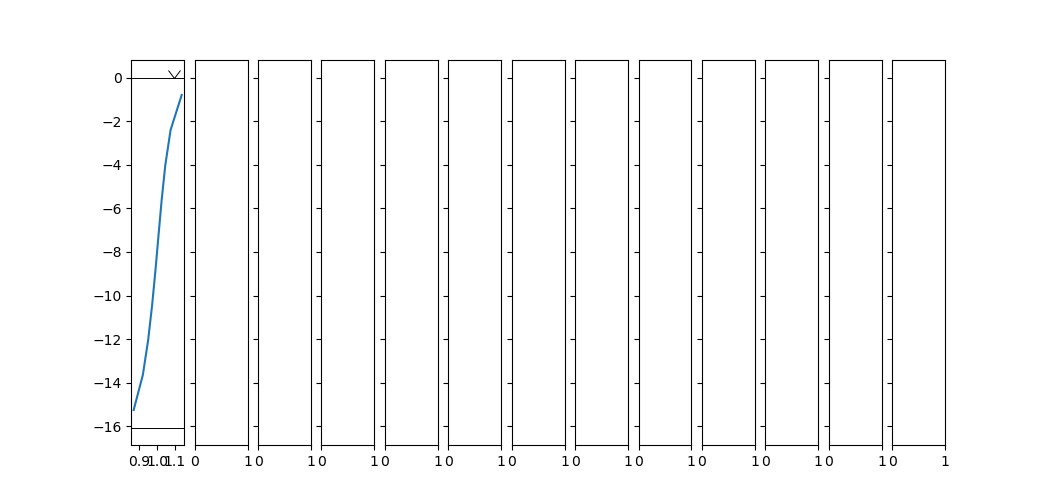

In [19]:
# Trying to replicate the DFM analysis.
# Snapshot output is 2022-08-09T20:30:00

# Load the DFM/DWAQ results
run_dir="run_wy2022_take2_common_20220801-v006"
swim_speeds=[0,5.0,15.0,30,50] # manually transcribed from the notebook with the run.
ds=xr.open_dataset(os.path.join(run_dir,"dwaq_map.nc"))
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)

# Choose a spot off SF for developing the growth potential:h
pnt=[565000, 4.16141e6] # SMB-ish
Isat=40.0

c=g.select_cells_nearest(pnt)
# scal='BLOOMAlg04' # 30 m/d. Erroneously labeled 15 m/d previously
scal='BLOOMAlg03' # 15 m/d.

#fig,(ax,axI,axG)=plt.subplots(1,3,sharey=True)

tidxs=np.arange(424,424+26,2)
fig,axs=plt.subplots(1,len(tidxs),sharey=True,figsize=(10.5,5))

for ax,tidx in zip(axs,tidxs):
    col=ds.isel(time=tidx,face=c)
    h_bot=col['LocalDepth'].values
    h_top=np.r_[0.0, h_bot[:-1]]
    h_int=np.r_[0.0, h_bot]
    h_mid=0.5*(h_bot+h_top)
    H=float(col['TotalDepth'].mean())

    C=col[scal].values
    C=C / C.mean()

    if 1:
        ax.plot(C,-h_mid,label=scal)
        ax.axhline(0.0,color='k',lw=0.7)
        ax.axhline(-H,color='k',lw=0.7)
        ax.plot(0.8,0.0,marker=7,ms=8,mew=0.7,mfc='none',mec='k',
               transform=ax.get_yaxis_transform())
        
        #axI.semilogx(col['RadBot'],-h_bot,label='RadBot')
        #axI.semilogx(col['Rad'],-h_top,ls='--',label='Rad')
        
        # manually discretized light curve
        #RadSurf=float(col['RadSurf'].mean())
        #axI.axvline( RadSurf, color='r', label='RadSurf')
        #axI.axvline( Isat, color='r',ls='--',label='Isat')
        
        #extVl = float(col['ExtVl'].mean())
        #depth=np.linspace(0,H,100)
        #axI.semilogx(RadSurf*np.exp(-depth*extVl),-depth,label='I(z)')
        
        #axI.set_xlabel("W/m$^2$")
        #ax.legend(loc='upper left')
        #axI.legend(loc='upper left')
        
        # Solve the growth exactly, so we don't have to worry about interference
        # from depth variation.
        #  col[scal]: concentration
        C_avg=float(col[scal].mean())
        G0=wc.Gmax
        
        klight_indef=k_indef(h_int,extVl,RadSurf,40.0)
        seg_klight=G0*np.diff(klight_indef) / np.diff(h_int)
        #axG.plot( seg_klight, -h_mid,'b-o',label='Light limitation')
        #axG.axis(xmin=0,xmax=G0)
        #axG.set_xlabel('Growth (day$^{-1}$)')
        # Concentration weighted average
        growth_avg=G0*np.sum(col[scal]*np.diff(klight_indef)) / (H*C_avg)
        #print(growth_avg)
        
        #axG.set_yticks(-h_int)
        #axG.grid(axis='y')
        #axI.grid(axis='y')
    
    
    if 1:
        df_time=df.index.values
        # Ending state should match
        sel = (df_time > np.datetime64("2022-07-01") ) & (df_time < col.time.values)
        # In spot check, Cd=0.0008 gave good agreement between vertical distributions.
        wc=GrowthColumn(df=df[ sel  ].copy(),
                        H=15.92,Cd=0.0008,ws=15.0, Kd=1.75)
        wc.compute_all_growth()
        wc.plot(ax=ax) 

    ax.axis(xmin=0.5,xmax=1.5)
    ax.set_title(col.time.values.astype('M8[m]'),fontsize=7)

fig.subplots_adjust(left=0.06,right=0.99,wspace=0.03)

In [20]:
df_time=df.index.values
sel = (df_time > np.datetime64("2022-06-01")) & (df_time<np.datetime64("2022-09-10"))
wc=GrowthColumn(df=df[sel].copy(), H=15.0, Cd=0.0008,ws=15.0, Kd=2.25)
wc.compute_all_growth()

(460860.982, 461687.949, -0.0206, 0.30109)

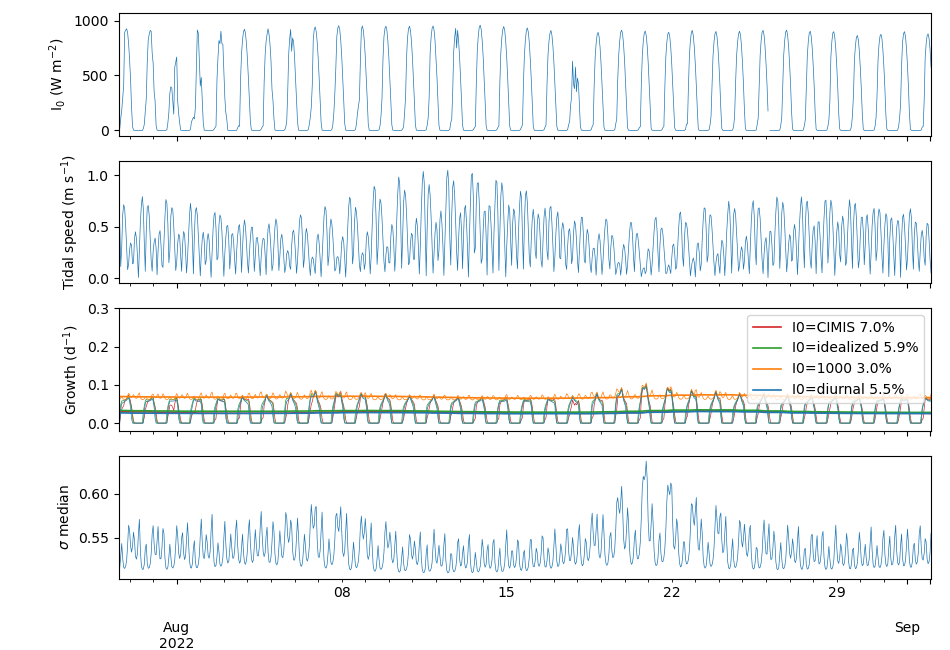

In [227]:
fig,axs=plt.subplots(4,1,sharex=True,figsize=(9.5,6.5))
df_sel=wc.df

kw=dict(lw=0.5)
df_sel['HlySolRad'].plot(ax=axs[0],**kw)
df_sel['tide_speed'].plot(ax=axs[1],**kw)
df_sel['s_median'].plot(ax=axs[3],**kw)

t=df_sel.index.values
colors=['tab:blue','tab:orange','tab:green', 'tab:red']
for field,label in [ ('growth','I0=CIMIS'),
                     ('growth_ideal','I0=idealized'),
                     ('growth_fullsun','I0=1000'),
                     ('growth_diurnal','I0=diurnal'),
                   ]:
    col=colors.pop()
    df_sel[field].plot(ax=axs[2], label='__none__', color=col,**kw)
    rolling_mean=df_sel[field].rolling('5D').mean()
    rolling_mean = rolling_mean[ rolling_mean.index.values > wc.t0+np.timedelta64(30,'D') ]
    pct_variation = rolling_mean.std() / rolling_mean.mean()
    rolling_mean.plot(ax=axs[2], color=col, lw=1.2, label=f"{label} {pct_variation*100:0.1f}%")

axs[0].set_ylabel('I$_0$ (W m$^{-2})$')
axs[1].set_ylabel('Tidal speed (m s$^{-1}$)')
axs[2].set_ylabel('Growth (d$^{-1}$)')
axs[3].set_ylabel(r'$\sigma$ median')

axs[2].legend(loc='upper right')
axs[2].set_xlabel(None)
fig.subplots_adjust(top=0.98,right=0.98)
axs[2].axis( (460860.982, 461687.949, -0.0206, 0.30109))

(19211.041, 19217.381, -0.05773, 1.25)

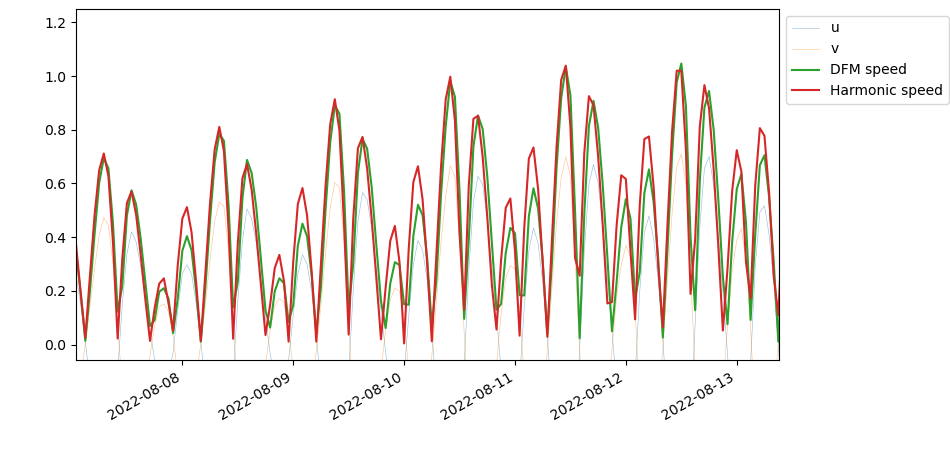

In [236]:
fig,ax=plt.subplots(figsize=(9.5,4.5))

ax.plot(hist_ds.time, dfm_u.values, label='u', lw=0.4,alpha=0.5)
ax.plot(hist_ds.time, dfm_v.values, label='v', lw=0.4,alpha=0.5)
ax.plot(hist_ds.time, np.sqrt(dfm_u**2+dfm_v**2), label='DFM speed')
ax.plot(wc.df.index.values, wc.df.tide_speed_harm,label='Harmonic speed')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
fig.autofmt_xdate()
fig.subplots_adjust(left=0.08,right=0.82,top=0.98)
ax.axis( (19211.0410, 19217.381, -0.05773, 1.25) )

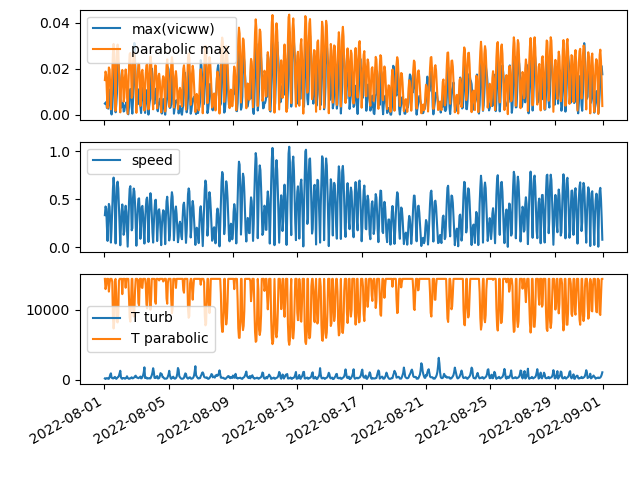

In [259]:
# Are vicww and u consistent in DFM?
time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
u=stn_ds.x_velocity.mean(dim='laydim')
v=stn_ds.y_velocity.mean(dim='laydim')
speed = np.sqrt(u**2 + v**2)

fig,axs=plt.subplots(3,1,sharex=True)
axs[0].plot(stn_ds.time, stn_ds.vicww.max(dim='laydimw'), label="max(vicww)")
# what would that be if it's parabolic, kappa * u
# z/H
Cd=0.0008
u_star = np.sqrt(Cd)*speed 
axs[0].plot(stn_ds.time, 0.4 * u_star * 0.25 * stn_ds.waterdepth, label='parabolic max')

axs[1].plot(stn_ds.time, speed, label="speed")

if 0: # stratification?
    delta_s = stn_ds['salinity'].isel(laydim=0) - stn_ds['salinity'].isel(laydim=-1)
    axs[2].plot(stn_ds.time, delta_s, label=r'$\Delta$ salt')
if 1: # adjustment time?
    # Adjustment time scale based on turbulence quantities
    turb_t = stn_ds.tke.isel(laydimw=4).values / stn_ds.eps.isel(laydimw=4).values
    axs[2].plot(stn_ds.time, turb_t, label='T turb')
    # Adjustment time based on parabolic viscosity
    H = stn_ds.waterdepth
    eddy_para_max = 0.4 * u_star * 0.25 * H
    para_t = (H / (0.4 * 0.25 * u_star)).clip(0,4*3600)
    axs[2].plot(stn_ds.time, para_t, label='T parabolic')
    
for ax in axs:
    ax.legend()

fig.autofmt_xdate()
fig.subplots_adjust(right=0.98,top=0.98)

In [21]:
# Comparing DFM, water column, and GOTM
import six
from stompy import xr_utils
import subprocess
six.moves.reload_module(xr_utils)
import golumn
six.moves.reload_module(golumn)
six.moves.reload_module(utils)

<module 'stompy.utils' from '/richmondvol1/rusty/stompy/stompy/utils.py'>

In [ ]:
# pull C(z) from DWAQ run for comparison:
run_dir="run_wy2022_take2_common_20220801-v006"
ds=xr.open_dataset(os.path.join(run_dir,"dwaq_map.nc"))
g=unstructured_grid.UnstructuredGrid.read_ugrid(ds)
pnt=[stn_ds.station_x_coordinate.values[0], stn_ds.station_y_coordinate.values[0]] # SMB-ish
c=g.select_cells_nearest(pnt)
scal='BLOOMAlg03' # 15 m/d.
tidxs=np.arange(50,1400) 
recs=[]
for tidx in tidxs:
    col=ds.isel(time=tidx,face=c)
    C=col[scal].values
    rec=dict(time=col.time.values,
             sig_median=1.0 - common.sigma_median(C))
    recs.append(rec)
dwaq_df=pd.DataFrame(recs)

In [ ]:
# Load 2022 mapping data
mapping_fn="../Kd_2022/mapping/summer2022_condensed.csv"
mapping_df=pd.read_csv(mapping_fn,parse_dates=['Datetime'])

In [74]:
# Load 2022 Peterson thalweg
from stompy.io.local import usgs_sfbay
from stompy.spatial import proj_utils

peterson_fn="usgs_peterson/2022SanFranciscoBayWaterQualityData.csv"
peterson_df=pd.read_csv(peterson_fn, parse_dates=[['Date','Time']])

#peterson_df.columns
peterson_stations = usgs_sfbay.station_locs()

df=peterson_stations
df=df[df.Distance_from_station_36.notnull()].sort_values('Distance_from_station_36')
ll=df[ ['longitude','latitude']].values
peterson_xy=proj_utils.mapper('WGS84','EPSG:26910')(ll)

In [288]:
# Tidal forcing:
six.moves.reload_module(golumn)
class BaseGolumn(golumn.Golumn):
    swim_m_d = 15.0 # up
    velocity_src='dfm' # or "harmonics"
    salt_src='dfm'
    temp_src='dfm' # or 'gradient'
    temp_scale=1.0
    dTdx = 0.1 # degC/km. careful of signs if salinity gradient is also included
    dTdy = 0.4 # degC/km. careful of signs...
    u10=3.0
    v10=0.0
    t_nudge=12*3600

    # Only used for harmonics.
    pnt=[ 564438., 4161870.] # also SMB, but aligns with DFM history station.
    
    def __init__(self,**kw):
        super().__init__()
        utils.set_keywords(self,kw)

        self.fabm_yaml['instances']['sed']['parameters']['vertical_velocity'] = self.swim_m_d # 15 m/d up 
        self.gotm_yaml['time']['start'] = datetime.datetime(2022,8,2,0,0)
        self.gotm_yaml['time']['stop' ] = datetime.datetime(2022,8,26,0,0)
        
        if self.velocity_src=='harmonics': # simple S2 tide in 8m
            self.set_velocity_harmonics()
        elif self.velocity_src=='dfm':
            self.set_velocity_dfm()
            
        if self.salt_src=='dfm':
            self.set_salt_dfm()
    
        if self.temp_src=='dfm':
            self.set_temp_dfm()
        elif self.temp_src=='gradient':
            self.set_temp_gradient()
        else: 
            raise Exception("Bad temp src " + self.temp_src)

        self.set_wind()
        
        self.gotm_yaml['output']['rouse']['time_step']=25 # 15 minutes 
        self.gotm_yaml['bottom']['h0b'] = 1e-5 # 1e-3 # 0.03
        
    def set_velocity_harmonics(self):
        self.gotm_yaml['mimic_3d']['ext_pressure']['type'] = 'average_velocity'
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['method'] = 'tidal'
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['tidal'] = dict(amp_1=0.5,phase_1=0.0)
        self.gotm_yaml['mimic_3d']['ext_pressure']['period_1'] = 43200 # S2
        self.gotm_yaml['location']['depth']=8.0

    pnt=[ 564438., 4161870.] # also SMB, but aligns with DFM history station.

    def set_velocity_dfm(self):
        # Try to match a DFM station
        time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
        stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
        stn_ds['u'] = stn_ds.x_velocity.mean(dim='laydim')
        stn_ds['v'] = stn_ds.y_velocity.mean(dim='laydim')
        self.set_velocity_from_ds(stn_ds)

    def set_velocity_from_ds(self,ds):
        self.gotm_yaml['mimic_3d']['ext_pressure']['type'] = 'average_velocity'
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['method'] = 'file'
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdy']['method'] = 'file'
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdx']['file'] = self.write_file(ds.u)                                                                                   
        self.gotm_yaml['mimic_3d']['ext_pressure']['dpdy']['file'] = self.write_file(ds.v)
        self.gotm_yaml['location']['depth']=float(stn_ds.waterdepth.mean())
        
    def set_salt_dfm(self):
        salt=stn_ds.salinity
        salt['z'] = stn_ds.zcoordinate_c - stn_ds.waterlevel # Makes z relative to freesurface.
        self.gotm_yaml['salinity']['method'] = 'file'
        self.gotm_yaml['salinity']['file'] = self.write_file(salt)
        self.gotm_yaml['salinity']['relax']['tau']   = 1800 # Relax modeled salinity to DFM with time scale 0.5 h 
        self.gotm_yaml['salinity']['relax']['tau_s'] = 1800 # 
        self.gotm_yaml['salinity']['relax']['tau_b'] = 1800 # 
        
    def set_temp_dfm(self):
        mean_temp = stn_ds.temperature.mean() 
        temp=mean_temp + self.temp_scale*(stn_ds.temperature - mean_temp)
        temp['z'] = stn_ds.zcoordinate_c - stn_ds.waterlevel # Makes z relative to freesurface.
        
        self.gotm_yaml['temperature']['method'] = 'file'
        self.gotm_yaml['temperature']['file'] = self.write_file(temp)
        self.gotm_yaml['temperature']['relax']['tau']   = 1800 # Relax modeled temperature to DFM with time scale 0.5 h 
        self.gotm_yaml['temperature']['relax']['tau_s'] = 1800 # 
        self.gotm_yaml['temperature']['relax']['tau_b'] = 1800 # 

    def set_temp_gradient(self):
        mean_temp = stn_ds.temperature.mean() 

        self.gotm_yaml['mimic_3d']['int_pressure']['type'] = 'gradients'
        self.gotm_yaml['mimic_3d']['int_pressure']['gradients']['dtdx']['method'] = 'constant'
        self.gotm_yaml['mimic_3d']['int_pressure']['gradients']['dtdx']['constant_value'] = self.dTdx*1e-3
        self.gotm_yaml['mimic_3d']['int_pressure']['gradients']['dtdy']['method'] = 'constant'
        self.gotm_yaml['mimic_3d']['int_pressure']['gradients']['dtdy']['constant_value'] = self.dTdy*1e-3
        self.gotm_yaml['mimic_3d']['int_pressure']['t_adv'] = True

        # Unclear how a prescribed temperature profile and a horizontal temperature gradient
        # interact.
        
        self.gotm_yaml['temperature']['method'] = 'constant'
        self.gotm_yaml['temperature']['constant_value'] = 20.0
        # with 12h relaxation surface temp got out of hand.
        self.gotm_yaml['temperature']['relax']['tau']   = self.t_nudge 
        self.gotm_yaml['temperature']['relax']['tau_s'] = self.t_nudge 
        self.gotm_yaml['temperature']['relax']['tau_b'] = self.t_nudge

    def set_wind(self):
        self.gotm_yaml['surface']['fluxes']['method'] = 'off'        
        self.gotm_yaml['surface']['fluxes']['tx']['method'] = 'constant'        
        self.gotm_yaml['surface']['fluxes']['ty']['method'] = 'constant'     

        wind_mag = np.sqrt(self.u10**2 + self.v10**2)
        # Smith and Banke, 1975, via DFM manual
        Cd = np.interp(wind_mag, [0,100], [6.3e-4,7.23e-3])
        rho_air=1.3
        tau_x = rho_air * Cd * wind_mag * self.u10
        tau_y = rho_air * Cd * wind_mag * self.v10
        self.gotm_yaml['surface']['fluxes']['tx']['constant_value'] = float(tau_x) # Pa        
        self.gotm_yaml['surface']['fluxes']['ty']['constant_value'] = float(tau_y) # Pa     
        print(f"Wind stress: tau_x={tau_x:.3f} tau_y={tau_y:.3f}")


In [ ]:
# Temp gradients
glm = BaseGolumn(temp_src='gradient',velocity_src='dfm',
                 dTdx=0.4, dTdy=0.0, swim_m_d=10, u10=5.0, v10=0.0,t_nudge=12*3600)
glm.run()

fig,ax=plt.subplots()
t,z = xr.broadcast(glm.results.time, glm.results.z_coord)
coll = ax.pcolormesh( t,z, glm.results.temp, cmap='turbo', clim=coll.get_clim())
coll.set_clim([15,25])
plt.colorbar(coll,label='degC',ax=ax)
fig.autofmt_xdate()

Wind stress: tau_x=0.031 tau_y=0.000
Just wrote yaml config to  ../gotm/rouse_up/gotm.yaml


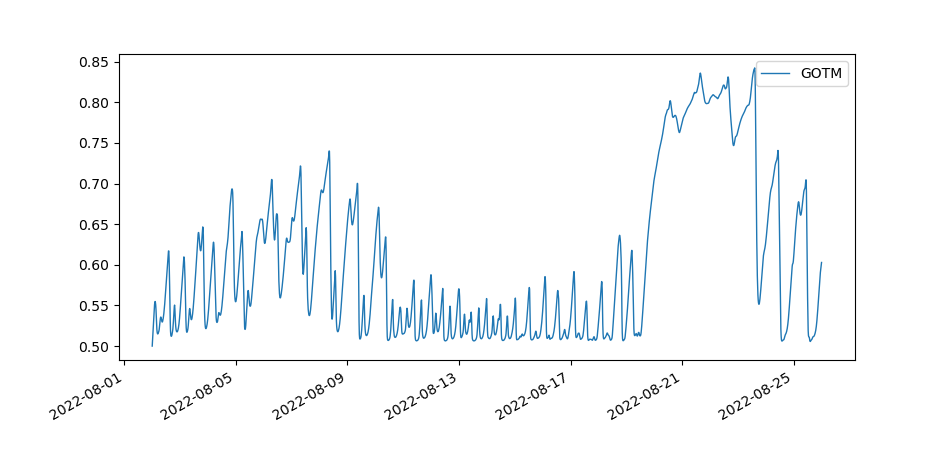

In [285]:
fig,ax=plt.subplots(figsize=(9.5,4.5))
gotm_sig_median = common.sigma_median(glm.results['sed_c'])
#ax.plot(dwaq_df.time,dwaq_df.sig_median, lw=1, label='DWAQ')
ax.plot(glm.results.time, gotm_sig_median, lw=1, label='GOTM')
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
fig.autofmt_xdate()

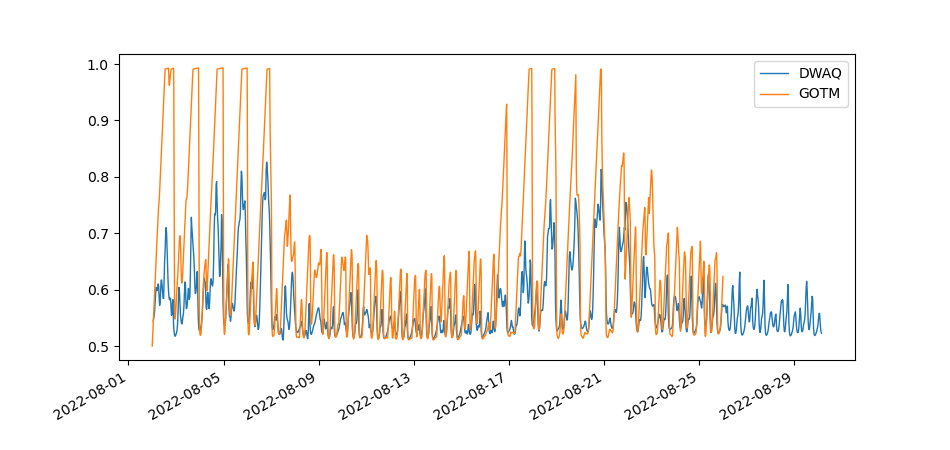

In [40]:
# And compare sigma_median
glm = BaseGolumn()
glm.run()

fig,ax=plt.subplots(figsize=(9.5,4.5))
gotm_sig_median = common.sigma_median(glm.results['sed_c'])
#ax.plot(dwaq_df.time,dwaq_df.sig_median, lw=1, label='DWAQ')
ax.plot(glm.results.time, gotm_sig_median, lw=1, label='GOTM')
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
fig.autofmt_xdate()

Running temp_scale=0
Running temp_scale=0.1
Running temp_scale=1.0


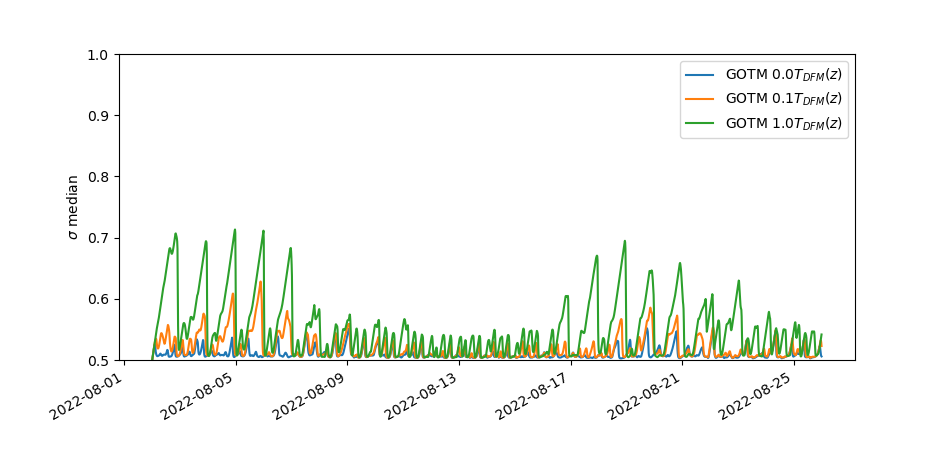

In [51]:
# Sensitivity to scaling temp variability
fig,ax=plt.subplots(figsize=(9.5,4.5))

for temp_scale in [0,0.1,1.0]:
    print(f"Running temp_scale={temp_scale}")
    glm = BaseGolumn(temp_scale=temp_scale,swim_m_d=5)
    glm.run()

    gotm_sig_median = common.sigma_median(glm.results['sed_c'])
    ax.plot(glm.results.time, gotm_sig_median, lw=1.5, label='GOTM %.1f$T_{DFM}(z)$'%temp_scale)
ax.legend(loc='upper right',bbox_to_anchor=(1,1))
ax.axis(ymin=0.5,ymax=1.0)
ax.set_ylabel('$\\sigma$ median') 
fig.autofmt_xdate()

In [ ]:
fig,ax=plt.subplots(figsize=(9.5,4.5))
gotm_sig_median = common.sigma_median(glm.results['sed_c'])
ax.plot(glm.results.time, gotm_sig_median, lw=1.5, label='GOTM dTdx=%.3f'%glm.dTdx)

ax.legend(loc='upper right',bbox_to_anchor=(1,1))
ax.axis(ymin=0.5,ymax=1.0)
ax.set_ylabel('$\\sigma$ median') 
fig.autofmt_xdate()

In [ ]:
fig,ax=plt.subplots(figsize=(9.5,4.5))

ax.plot(glm.results.time, gotm_sig_median, lw=1.5, label='GOTM dTdx=%.3f'%glm.dTdx)

ax.legend(loc='upper right',bbox_to_anchor=(1,1))
ax.axis(ymin=0.5,ymax=1.0)
ax.set_ylabel('$\\sigma$ median') 
fig.autofmt_xdate()

In [141]:
# Estimate dT/dx and dT/dy from cruises. 
from shapely import geometry
from stompy.spatial import linestring_utils

# Smoothed version of thalweg
thalweg=peterson_xy[np.arange(peterson_xy.shape[0])!=9,:] # annoying kink in transect
thalweg=linestring_utils.upsample_linearring(thalweg,density=200.0,closed_ring=0)
for comp in [0,1]:
    thalweg[:,comp] = filters.lowpass_fir(thalweg[:,comp],80)
        
def add_thal_xy(df):
    geo_thalweg=geometry.LineString(thalweg)
    
    def utm_to_xy(rec):
        pnt = geometry.Point(rec.utm_x,rec.utm_y)
        x = geo_thalweg.project(pnt)
        dx=1000.0
        x_pnt    = geo_thalweg.interpolate(x)
        x_mdx_pnt = geo_thalweg.interpolate(x-dx)
        x_pdx_pnt = geo_thalweg.interpolate(x+dx)
        y = geo_thalweg.distance(pnt) # but need a sign.
        pos_x = np.array(x_pdx_pnt.coords[0]) - np.array(x_mdx_pnt.coords[0]) # south bay -> central bay
        perp = np.array(pnt.coords[0]) - np.array(x_pnt.coords[0])
        y *= np.sign( np.cross( pos_x, perp) )
        return pd.Series({'x':x,'y':y})

    xy_coords = df.apply(utm_to_xy,axis=1)
    df['thal_x'] = xy_coords['x']
    df['thal_y'] = xy_coords['y']
    return df

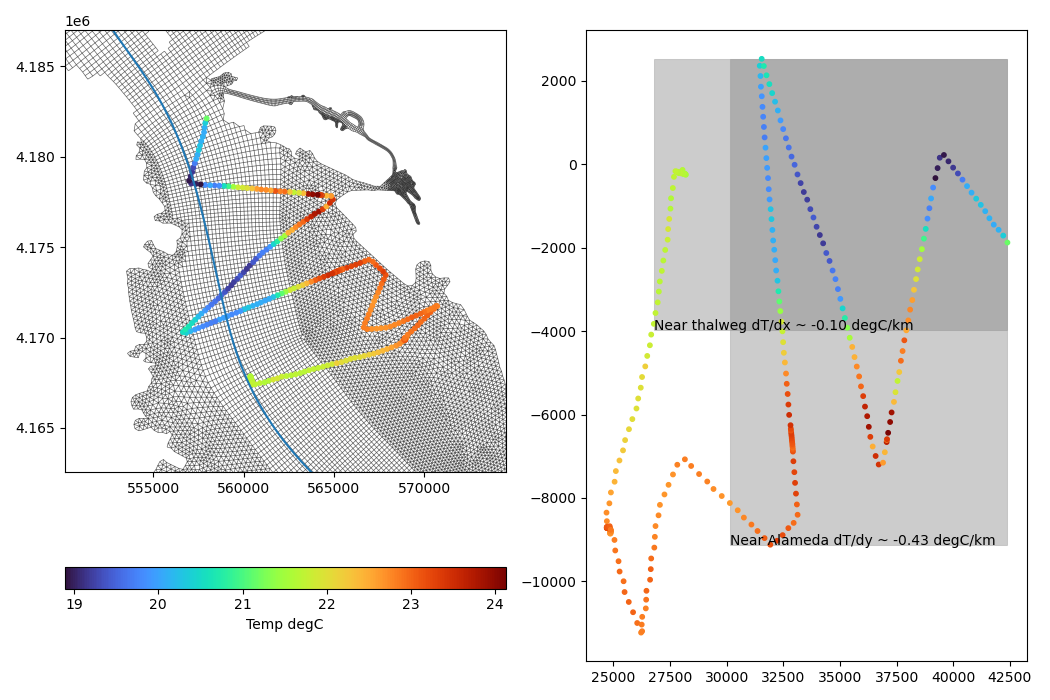

In [176]:
#mapping_day = mapping_df[ mapping_df.Datetime.dt.date == datetime.date(2022,8,10) ].iloc[::20,:].copy()
sel= ( (mapping_df.Datetime >= datetime.datetime(2022,8,10,10,40)) # roughly southern most
      &(mapping_df.Datetime <= datetime.datetime(2022,8,10,12,17)) ) # before entering Alameda Channel
mapping_day = mapping_df[ sel ].iloc[::20,:].copy()

add_thal_xy(mapping_day)

fig,axs=plt.subplots(1,2,figsize=(10.5,7))
ax=axs[0]
ax.set_adjustable('datalim')
grid_harmonics.plot_edges(lw=0.5,color='k',alpha=0.6,ax=ax,zorder=0)
scat=ax.scatter( mapping_day.utm_x, mapping_day.utm_y, 10, mapping_day['temp.exo_C'], zorder=2, cmap='turbo')
#ax.scatter( mapping_day.utm_x, mapping_day.utm_y, 10, mapping_day['thal_x'], zorder=2, cmap='turbo')
#ax.scatter( mapping_day.utm_x, mapping_day.utm_y, 10, mapping_day['thal_y'], zorder=2, cmap='turbo')

ax.plot(thalweg[:,0], thalweg[:,1])
ax.axis('equal')
ax.axis( (550320., 574278., 4164761., 4184806.))

cbar=plt.colorbar(scat,ax=ax,label='Temp degC',orientation='horizontal')

ax=axs[1]
scat=ax.scatter( mapping_day.thal_x, mapping_day.thal_y, 10, mapping_day['temp.exo_C'], zorder=2, cmap='turbo')

fig.tight_layout()
# For starters ignore advection, manually get some typical gradients

def annotate_fit(fit_data,label,ax):
    x=fit_data['thal_x']
    y=fit_data['thal_y']
    poly=np.array( [ [x.min(), y.min()], [x.max(), y.min()], [x.max(),y.max()], [x.min(),y.max()]] )
    ax.fill(poly[:,0], poly[:,1], fc="0.5",ec="0.6",lw=0.75,zorder=-1,alpha=0.4)
    ax.text(x.min(), y.min(),label)
        
# Near-thalweg longitudinal temperature gradient:
sel = mapping_day.thal_y>-4000
fit_data=mapping_day[sel]
dTdx,_ = np.polyfit( fit_data.thal_x, fit_data['temp.exo_C'], 1) 
annotate_fit(fit_data,f"Near thalweg dT/dx ~ {1000*dTdx:.2f} degC/km",ax=ax)

# And lateral gradient, ignore southern most part of transect
sel = mapping_day.thal_x>30000
fit_data=mapping_day[sel]
dTdy,_  = np.polyfit( fit_data.thal_y, fit_data['temp.exo_C'], 1)
annotate_fit(fit_data,f"Near Alameda dT/dy ~ {1000*dTdy:.2f} degC/km",ax=ax) 


(19205.283, 19211.9848)

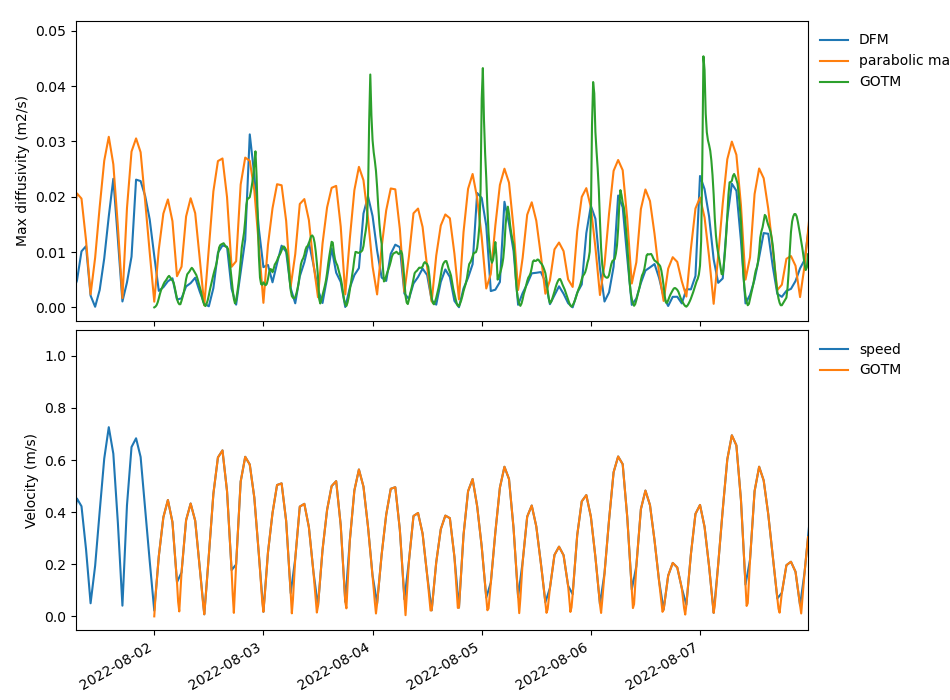

In [23]:
# Compare viscosity and velocity across GOTM, DFM and water column
time_sel = (hist_ds.time.values>np.datetime64("2022-08-01")) & (hist_ds.time.values<np.datetime64("2022-09-01"))
stn_ds = hist_ds.isel(stations=station_idx,time=time_sel)
u=stn_ds.x_velocity.mean(dim='laydim')
v=stn_ds.y_velocity.mean(dim='laydim')
speed = np.sqrt(u**2 + v**2)

fig,axs=plt.subplots(2,1,sharex=True,figsize=(9.5,7))
axs[0].plot(stn_ds.time, stn_ds.vicww.max(dim='laydimw'), label="DFM")
# what would that be if it's parabolic, kappa * u
Cd=0.0008
u_star = np.sqrt(Cd)*speed 
axs[0].plot(stn_ds.time, 0.4 * u_star * 0.25 * stn_ds.waterdepth, label='parabolic max')

axs[1].plot(stn_ds.time, speed, label="speed")

glm_speed = np.sqrt( glm.results.u.mean(dim='z')**2 + glm.results.v.mean(dim='z')**2 )
axs[1].plot(glm.results.time, glm_speed, label='GOTM')
axs[0].plot(glm.results.time, glm.results.nus.max(dim='zi'), label='GOTM')

axs[0].set_ylabel('Max diffusivity (m2/s)')
axs[1].set_ylabel('Velocity (m/s)')
for ax in axs:
    ax.legend(loc='upper left',bbox_to_anchor=(1,1),frameon=0)
fig.autofmt_xdate()
fig.subplots_adjust(right=0.85,top=0.97,left=0.08,bottom=0.10,hspace=0.03)
axs[0].set_xlim(19205.283, 19211.9848)

/tmp/ipykernel_1227180/1409910737.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  coll = ax.pcolormesh( t, z , stn_ds.vicww, cmap='turbo')


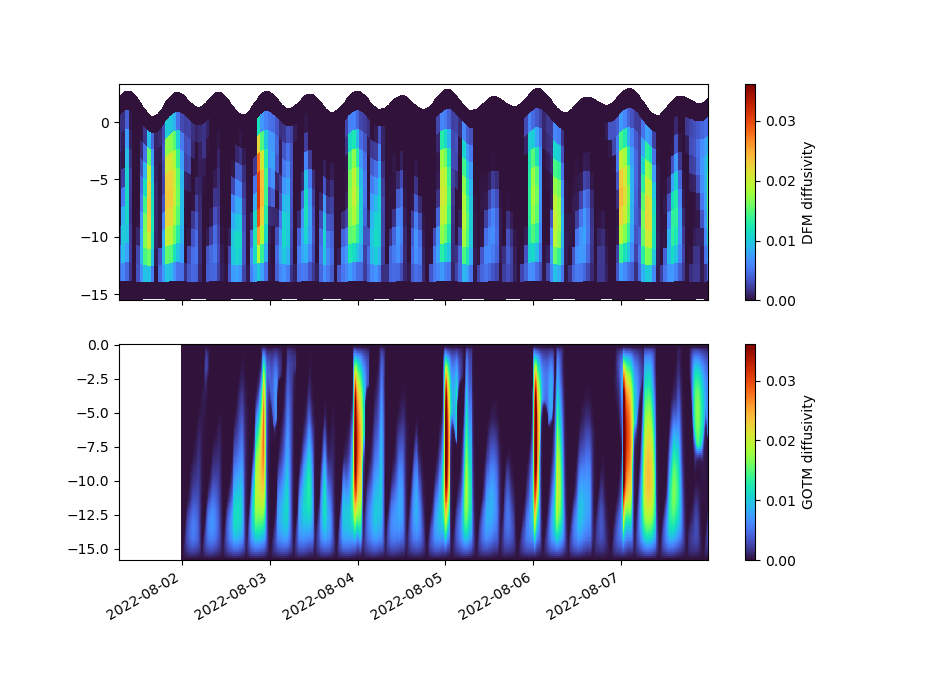

In [28]:

for field in ['nus']:
    fig,axs=plt.subplots(2,1,sharex=True,figsize=(9.5,7))

    # Upper panel: DFM salt
    ax=axs[0]
    if field=='salt':
        t,z = xr.broadcast(stn_ds.time, stn_ds.zcoordinate_c)
        coll = ax.pcolormesh( t, z , stn_ds.salinity, cmap='turbo')
        plt.colorbar(coll,label='DFM salinity',ax=ax)
    elif field=='nus':
        t,z = xr.broadcast(stn_ds.time, stn_ds.zcoordinate_w)
        coll = ax.pcolormesh( t, z , stn_ds.vicww, cmap='turbo')
        plt.colorbar(coll,label='DFM diffusivity',ax=ax)
    
    # Lower panel: GOTM salt
    ax=axs[1]
    t,z = xr.broadcast(glm.results.time, glm.results.z_coord)
    if field=='salt':
        t,z = xr.broadcast(glm.results.time, glm.results.z_coord)
        coll = ax.pcolormesh( t,z, glm.results.salt, cmap='turbo', clim=coll.get_clim())
        plt.colorbar(coll,label='GOTM salinity',ax=ax)
    elif field=='nus':
        t,z = xr.broadcast(glm.results.time, glm.results.zi_coord)
        coll = ax.pcolormesh( t,z, glm.results.nus, cmap='turbo', clim=coll.get_clim())
        plt.colorbar(coll,label='GOTM diffusivity',ax=ax)
    
    fig.autofmt_xdate()
    axs[0].set_xlim(19205.283, 19211.9848)

In [30]:
#fig=glm.fig_time_z(['nus','salt_p','sed_c','temp'],column=True)
#fig.axes[1].collections[0].set_clim(30.9,31.0)
#fig.axes[2].collections[0].set_clim(0.5,1.5)

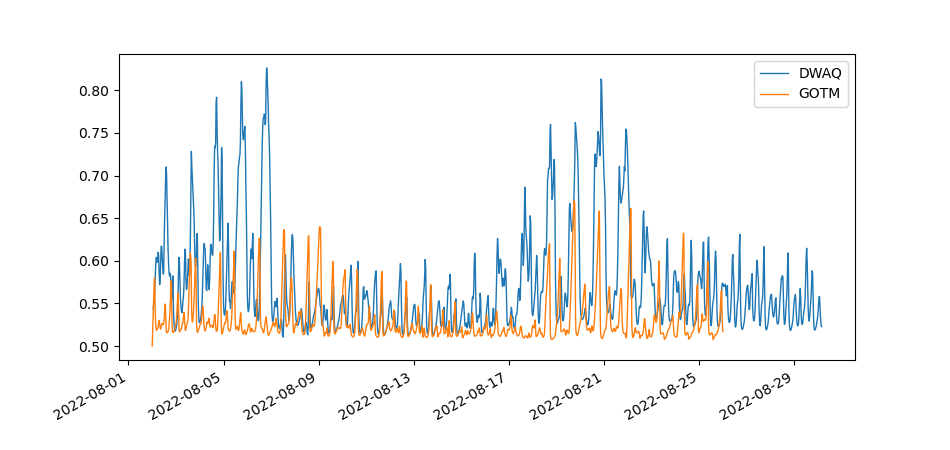

In [444]:
# DFM might think it's a temperature thing, though?
profile.temperature.values

array([21.32034421, 21.36470603, 21.45177784, 21.62773239, 21.86302066,
       22.11204039, 22.33621333, 22.56109145, 22.8486375 , 23.13820909])